In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [42]:
df = pd.read_csv('student-mat.csv',delimiter=";")
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [43]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder

df['school'] = LabelEncoder().fit_transform(df['school'])
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['address'] = LabelEncoder().fit_transform(df['address'])
df['famsize'] = LabelEncoder().fit_transform(df['famsize'])
df['Pstatus'] = LabelEncoder().fit_transform(df['Pstatus'])
df['Mjob'] = LabelEncoder().fit_transform(df['Mjob'])
df['Fjob'] = LabelEncoder().fit_transform(df['Fjob'])
df['reason'] = LabelEncoder().fit_transform(df['reason'])
df['guardian'] = LabelEncoder().fit_transform(df['guardian'])

In [45]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [120]:
X= df[['G1']]
y = df['absences']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
model1 = LinearRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

In [122]:
print("Stats for Model trained and tested with OLS")
print("Coefficient: ",model1.coef_)
print("Intercept: ",model1.intercept_)
print("R2 Score: ",r2_score(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

Stats for Model trained and tested with OLS
Coefficient:  [-0.01104234]
Intercept:  6.025795239967575
R2 Score:  -0.02466195889548839
MSE:  36.72627510162628


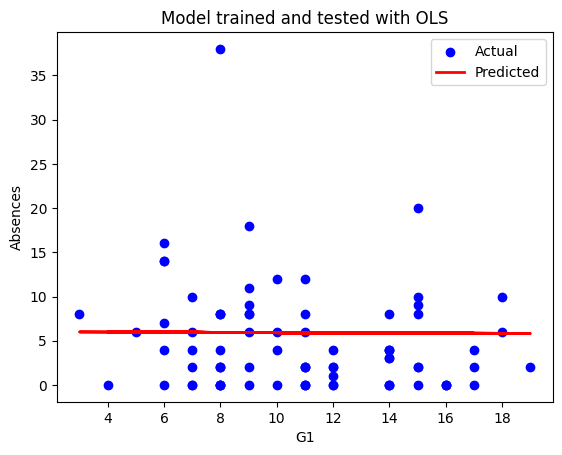

In [123]:
plt.scatter(X_test,y_test,color='blue',label="Actual")
plt.plot(X_test,y_pred,color='red',linewidth=2,label="Predicted")
plt.xlabel("G1")
plt.ylabel("Absences")
plt.title("Model trained and tested with OLS")
plt.legend()
plt.show()

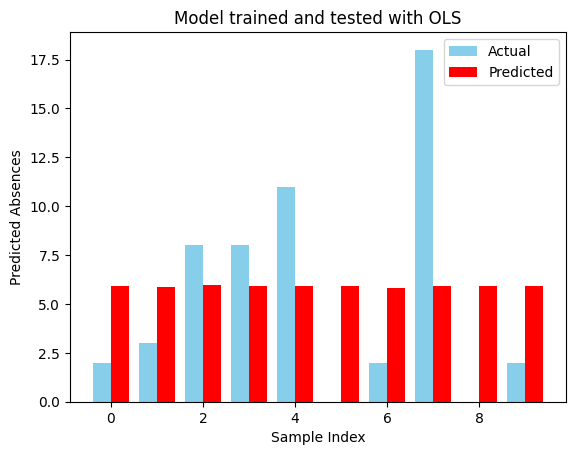

In [124]:
n=10
indices = np.arange(n)
plt.figure()
plt.bar(indices - 0.2, y_test[:n],width=0.4,color='skyblue',label='Actual')
plt.bar (indices +0.2, y_pred[:n],width=0.4,color='red',label='Predicted')
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel('Predicted Absences')
plt.title("Model trained and tested with OLS")
plt.show()

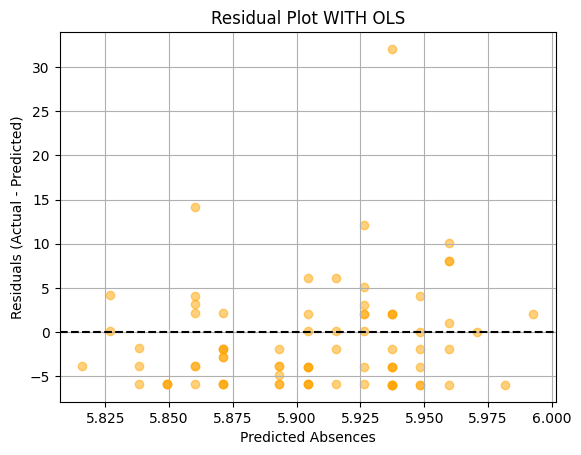

In [125]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='orange', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Absences')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot WITH OLS')
plt.grid(True)
plt.show()

In [ ]:
model2 = SGDRegressor(max_iter=100, learning_rate='invscaling', eta0=0.01, random_state=42)
X_train_scaled = StandardScaler().fit_transform(X_train)
model2.fit(X_train_scaled, y_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
y_pred2 = model2.predict(X_test_scaled)

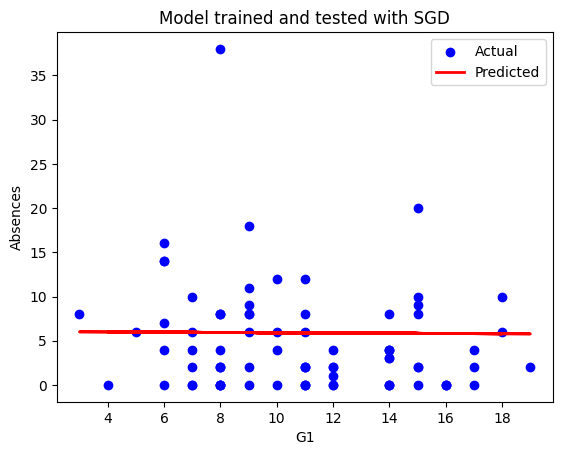

In [127]:
plt.scatter(X_test,y_test,color='blue',label="Actual")
plt.plot(X_test,y_pred2,color='red',linewidth=2,label="Predicted")
plt.xlabel("G1")
plt.ylabel("Absences")
plt.title("Model trained and tested with SGD")
plt.legend()
plt.show()

In [128]:
print("Stats for Model trained and tested with SGD")
print("Coefficient: ",model2.coef_)
print("Intercept: ",model2.intercept_)
print("R2 Score: ",r2_score(y_test,y_pred2))
print("MSE: ",mean_squared_error(y_test,y_pred2))

Stats for Model trained and tested with SGD
Coefficient:  [-0.05342538]
Intercept:  [5.89157057]
R2 Score:  -0.02317446457824346
MSE:  36.67295983503229


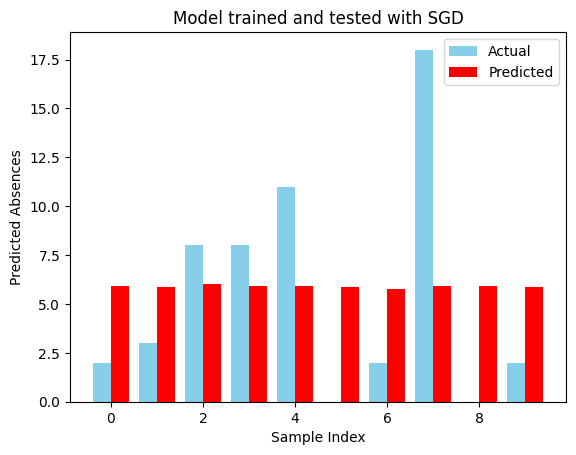

In [129]:
n=10
indices = np.arange(n)
plt.figure()
plt.bar(indices - 0.2, y_test[:n],width=0.4,color='skyblue',label='Actual')
plt.bar (indices +0.2, y_pred2[:n],width=0.4,color='red',label='Predicted')
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel('Predicted Absences')
plt.title("Model trained and tested with SGD")
plt.show()

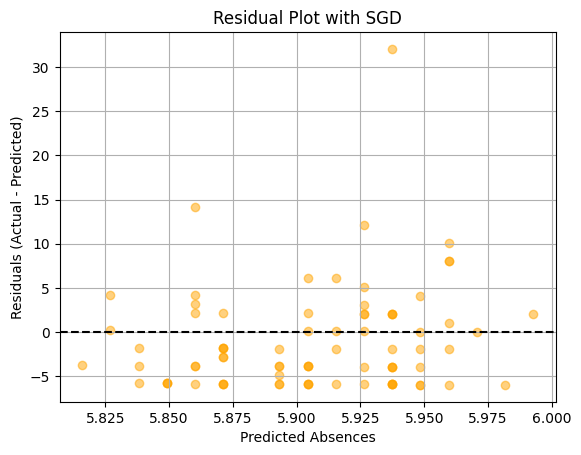

In [130]:
residuals = y_test - y_pred2
plt.scatter(y_pred, residuals, color='orange', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Absences')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot with SGD')
plt.grid(True)
plt.show()

In [136]:
#Multi- Linear Regression Model
X = df[['G1','G2','G3','studytime','failures']]
y = df['absences']

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model2 = LinearRegression()
model2.fit(X_train,y_train)

y_pred = model2.predict(X_test)

In [137]:
print("Stats for Model trained and tested with Multiple IV's IN ols")
print("Coefficient: ",model3.coef_)
print("Intercept: ",model3.intercept_)
print("R2 Score: ",r2_score(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

Stats for Model trained and tested with Multiple IV's IN ols
Coefficient:  [-0.07009386 -0.79421402  0.78933072 -0.22414317  0.60536068]
Intercept:  7.236597932676967
R2 Score:  -0.03749407100827162
MSE:  37.1862079365458


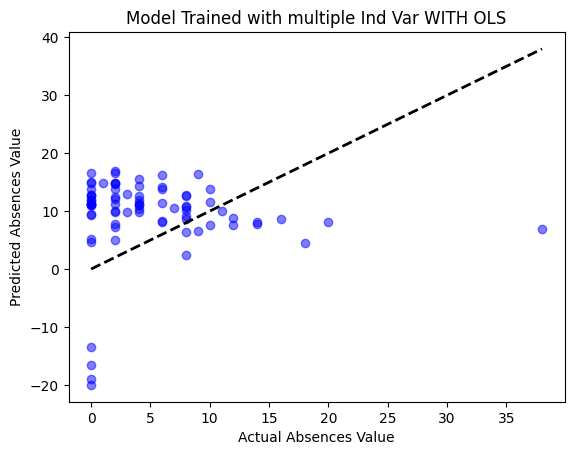

In [146]:
plt.scatter(y_test,y_pred, color='blue',alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Absences Value")
plt.ylabel("Predicted Absences Value")
plt.title("Model Trained with multiple Ind Var WITH OLS")
plt.show()

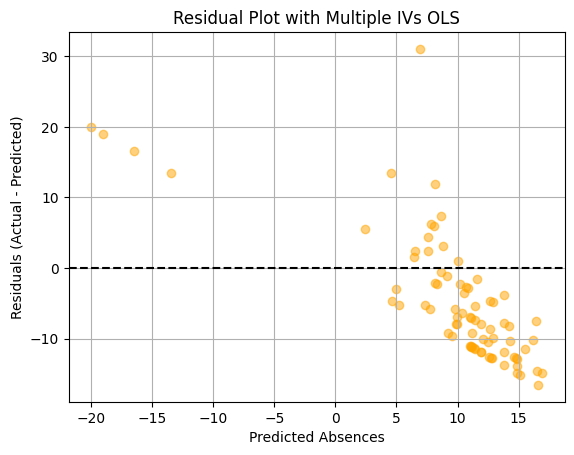

In [147]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='orange', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Absences')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot with Multiple IVs OLS')
plt.grid(True)
plt.show()


In [143]:
#Multi- Linear Regression Model
X = df[['G1','G2','G3','studytime','failures']]
y = df['absences']

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model4 = SGDRegressor(max_iter=100, learning_rate='invscaling', eta0=0.01, random_state=42)
X_train_scaled = StandardScaler().fit_transform(X_train)
model4.fit(X_train_scaled, y_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
y_pred4 = model4.predict(X_test_scaled)

In [148]:
print("Stats for Model trained and tested with Multiple IV's with SGD")
print("Coefficient: ",model4.coef_)
print("Intercept: ",model4.intercept_)
print("R2 Score: ",r2_score(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

Stats for Model trained and tested with Multiple IV's with SGD
Coefficient:  [-0.33393597 -2.41786581  3.15976512 -0.20163149  0.4183496 ]
Intercept:  [5.90149889]
R2 Score:  -1.9263747124659951
MSE:  104.88809680835499


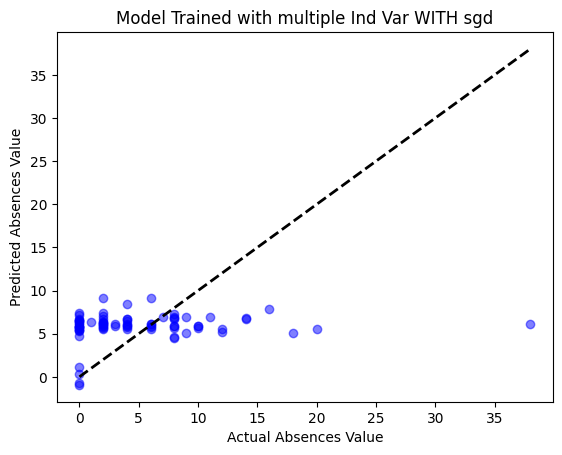

In [149]:
#Plotting vs Actual vs Predicted Sales Values

plt.scatter(y_test,y_pred4, color='blue',alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Absences Value")
plt.ylabel("Predicted Absences Value")
plt.title("Model Trained with multiple Ind Var WITH sgd")
plt.show()

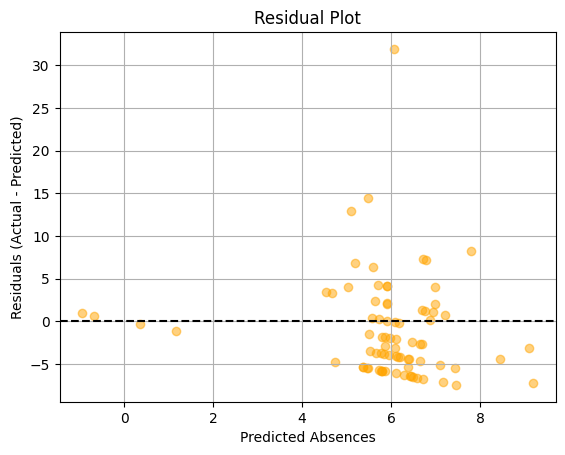

In [150]:
residuals = y_test - y_pred4
plt.scatter(y_pred4, residuals, color='orange', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Absences')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()